# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [0]:
#new topology

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [0]:
# Build encoder model
inputs = keras.Input(shape=(784,))

l2 = layers.Dense(64, activation="relu")(inputs)
l3 = layers.Dense(32, activation="relu")(l2)

In [94]:
#decoder
l4 = layers.Dense(32,activation="relu" )(l3)
l5 = layers.Dense(64, activation="relu")(l4)
outputs = layers.Dense(784, activation="sigmoid")(l5) 

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_49 (Dense)             (None, 784)               50960     
Total params: 106,448
Trainable params: 106,448
Non-trainable params: 0
____________________________________________________

In [0]:
# Loss function
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="mean_squared_error") 

In [96]:
 #train the model

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = model.fit(x_train, x_train, batch_size=32, epochs=10, ) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0220
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0215
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210


In [0]:
#test data
test_data = model.predict(x_train)

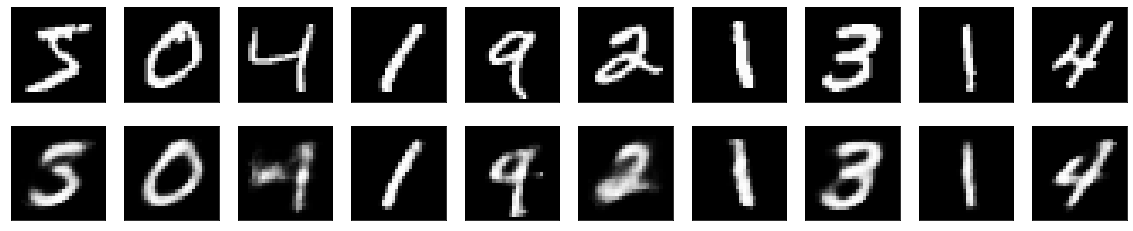

In [98]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):

    #  original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_data[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [99]:
#optimize model
history = model.fit(x_train, x_train, batch_size=32, epochs=15, ) 

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0208
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0208
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205
Epoch 11/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205
Epoch 12/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205
E

In [0]:
#test new model
test_data = model.predict(x_test)

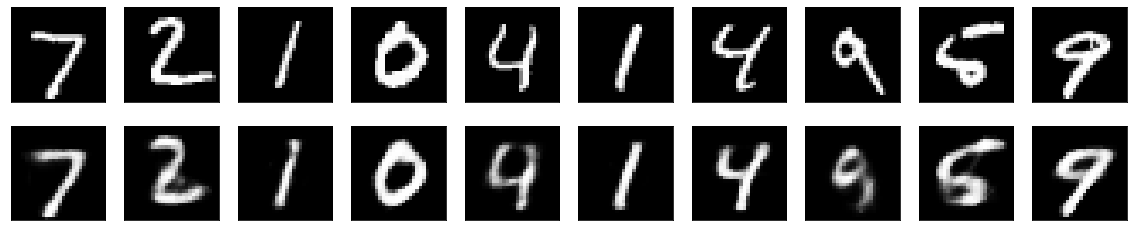

In [101]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    #  original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_data[i].reshape(28, 28))
   
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
#outlier detection

error = np.sum(np.abs(x_test-test_data),axis=1)

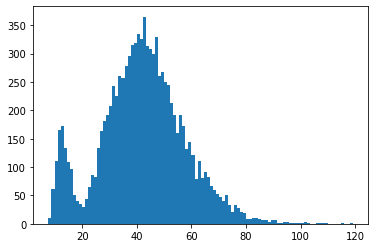

In [103]:
#histogramm 
t=plt.hist(error, bins=100)

In [0]:
#outlier
outliers = x_test[error>90]
outlier_pred = test_data[error>90]

In [105]:
np.shape(outliers)

(35, 784)

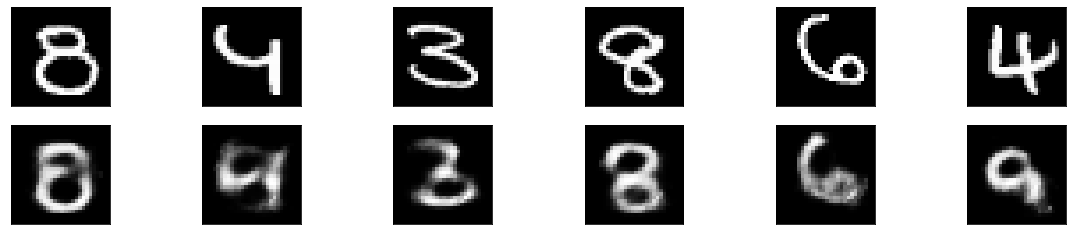

In [106]:
#visualize outliers

n = 6  
plt.figure(figsize=(20, 4))
for i in range(n):
    #  original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(outliers[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outlier_pred[i].reshape(28, 28))
   
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()